# I. Разминка numpy (1 балл)

## 1. Парсеки

Напишите функцию, которая принимает на вход:
- np.array - набор расстояний от Земли до звёзд (в световых годах)
- k - количество значений, которое нам нужно

Выведите топ-k самых удаленных звёзд от нас в порядке убывания разрастания, расстояния выведите в парсеках (1 парсек приблизительно равен 3.262 световым годам)

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
def find_top_k_longest_distance_stars(arr, k):
    arr_sorted = np.sort(arr)[::-1]
    answer = arr_sorted[0:k] / 3.262
    return answer


In [3]:
# Просто пример, можно придумать свой
print(find_top_k_longest_distance_stars(np.array([4.37, 8.6, 4.24, 4.37, 5.96, 7.8, 8.6, 7.9]), 4))

[2.63641937 2.63641937 2.4218271  2.39117106]


## 2. Оцениваем размер галактики

Напишите функцию, которая принимает на вход:
- np.array - набор масс звёзд в галактике
- k - количество максимальных по массе звёзд

Функция должна вывести два числа - первое - сумму масс первых k звёзд по массе, второе - сумму масс остальных звёзд.

In [4]:
def count_k_masses(arr, k):
    first_sum = np.sum(np.sort(arr)[::-1][0:k])
    second_sum = np.sum(arr) - first_sum
    return first_sum, second_sum

In [5]:
# Просто пример, можно придумать свой
print(count_k_masses(np.array([150, 200, 300, 250, 400, 100, 200]), 2))

(700, 900)


# II. Помогаем Карелии

## 0. Загрузи датасет в этот блокнот (0.5 балла)

Открой гугл-диск курса, разархивируй zip-архив и собери нужные наборы данных из архива в единый датасет при помощи pandas.

In [6]:
import pandas as pd

In [8]:
data_incomes=[]

for i in [6, 7, 8, 9, 10, 0, 1]:
    skip = 2 if i in [6, 7, 8, 9, 10] else 3
    try: # спасибо за непостоянство в использовании запятых)))))))
      globals()[f'df_i_{2010+i}'] = pd.read_excel(f'{2010+i}.xlsx', sheet_name=f'доходы (исполнено), {2010+i}', skiprows=skip)
    except:
      globals()[f'df_i_{2010+i}'] = pd.read_excel(f'{2010+i}.xlsx', sheet_name=f'доходы (исполнено) {2010+i}', skiprows=skip)


for i in [3, 5]:
    try:
      globals()[f'df_i_{2010+i}'] = pd.read_excel(f'{2010+i}.xls', sheet_name=f'доходы (исполнено), {2010+i}', skiprows=3)
    except:
      globals()[f'df_i_{2010+i}'] = pd.read_excel(f'{2010+i}.xls', sheet_name=f'доходы (исполнено) {2010+i}', skiprows=3)


for i in [4, 2]:
    try:
      globals()[f'df_i_{2010+i}'] = pd.read_excel(f'{2010+i}.XLS', sheet_name=f'доходы (исполнено), {2010+i}', skiprows=3)
    except:
      globals()[f'df_i_{2010+i}'] = pd.read_excel(f'{2010+i}.XLS', sheet_name=f'доходы (исполнено) {2010+i}', skiprows=3)


for i in range(11):
    num_cols = len(globals()[f'df_i_{2010+i}'].columns)
    globals()[f'df_i_{2010+i}'] = globals()[f'df_i_{2010+i}'].iloc[:, [0, num_cols - 1]]
    globals()[f'df_i_{2010+i}'].columns = ['Статьи доходов', f'{2010 + i}']
    data_incomes.append(globals()[f'df_i_{2010+i}'])



In [9]:
df_i_2010.head(7)

,Статьи доходов,2010
0,НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ,1.532213e+10
1,"НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ",8.613483e+09
2,Налог на прибыль организаций,3.980212e+09
3,"Налог на прибыль организаций, зачисляемый в бю...",3.980212e+09
4,"Налог на прибыль организаций, зачисляемый в бю...",3.980214e+09
5,Налог на прибыль организаций для сельскохозяйс...,-1.415610e+03
6,Налог на доходы физических лиц,4.633271e+09


In [10]:
data_expenses=[]

for i in [6, 7, 8, 9, 10, 0, 1]:
    skip = 2 if i in [6, 7, 9, 0, 1] else 3  # какие прекрасные данные)))))))))
    try: # прекрасные названия листов)))))))
      globals()[f'df_e_{2010+i}'] = pd.read_excel(f'{2010+i}.xlsx', sheet_name=f'расходы (исполнено), {2010+i}', skiprows=skip)
    except:
        try:
            globals()[f'df_e_{2010+i}'] = pd.read_excel(f'{2010+i}.xlsx', sheet_name=f'расходы (исполнено) {2010+i}', skiprows=skip)
        except:
            globals()[f'df_e_{2010+i}'] = pd.read_excel(f'{2010+i}.xlsx', sheet_name=f'{2010+i} расходы (исполнено)', skiprows=skip)

for i in [3, 5]:
    try:
      globals()[f'df_e_{2010+i}'] = pd.read_excel(f'{2010+i}.xls', sheet_name=f'расходы (исполнено), {2010+i}', skiprows=3)
    except:
      try:
          globals()[f'df_e_{2010+i}'] = pd.read_excel(f'{2010+i}.xls', sheet_name=f'расходы (исполнено) {2010+i}', skiprows=3)
      except:
          globals()[f'df_e_{2010+i}'] = pd.read_excel(f'{2010+i}.xls', sheet_name=f'{2010+i} расходы (исполнено)', skiprows=3)

for i in [4, 2]:
    try:
      globals()[f'df_e_{2010+i}'] = pd.read_excel(f'{2010+i}.XLS', sheet_name=f'расходы (исполнено), {2010+i}', skiprows=3)
    except:
        try:
            globals()[f'df_e_{2010+i}'] = pd.read_excel(f'{2010+i}.XLS', sheet_name=f'расходы (исполнено) {2010+i}', skiprows=3)
        except:
            globals()[f'df_e_{2010+i}'] = pd.read_excel(f'{2010+i}.XLS', sheet_name=f'{2010+i} расходы (исполнено)', skiprows=3)


for i in range(11):
    first = 0 if i <=5 else 1
    num_cols = len(globals()[f'df_e_{2010+i}'].columns)
    globals()[f'df_e_{2010+i}'] = globals()[f'df_e_{2010+i}'].iloc[:, [first, num_cols - 1]]
    globals()[f'df_e_{2010+i}'].columns = ['Статьи расходов', f'{2010 + i}']
    data_expenses.append(globals()[f'df_e_{2010+i}'])


In [11]:
data_incomes[0].head(7)

,Статьи доходов,2010
0,НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ,1.532213e+10
1,"НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ",8.613483e+09
2,Налог на прибыль организаций,3.980212e+09
3,"Налог на прибыль организаций, зачисляемый в бю...",3.980212e+09
4,"Налог на прибыль организаций, зачисляемый в бю...",3.980214e+09
5,Налог на прибыль организаций для сельскохозяйс...,-1.415610e+03
6,Налог на доходы физических лиц,4.633271e+09


In [12]:
df_i = data_incomes[0]
for i in range(1, 11):
    df_i = pd.merge(df_i, data_incomes[i], on='Статьи доходов', how='inner')
df_i = df_i.dropna()
df_i = df_i.drop_duplicates(subset=['Статьи доходов'], keep='first')
df_i.reset_index(drop=True, inplace=True)
df_i.head(7)

,Статьи доходов,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ,1.532213e+10,1.820269e+10,1.757042e+10,1.517376e+10,1.595676e+10,1.780816e+10,1.965441e+10,2.012920e+10,2.660435e+10,2.776398e+10,2.713114e+10
1,"НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ",8.613483e+09,1.133454e+10,1.081373e+10,8.101886e+09,8.916328e+09,9.962889e+09,1.151807e+10,1.170081e+10,1.690036e+10,1.733688e+10,1.516577e+10
2,Налог на прибыль организаций,3.980212e+09,6.262562e+09,5.279888e+09,2.200022e+09,1.837840e+09,3.114014e+09,4.280042e+09,4.022683e+09,8.128882e+09,8.162340e+09,5.058408e+09
3,"Налог на прибыль организаций, зачисляемый в бю...",3.980212e+09,6.262562e+09,5.279888e+09,2.200022e+09,1.837840e+09,3.114014e+09,4.280042e+09,4.022683e+09,8.128882e+09,8.162340e+09,5.058408e+09
4,Налог на доходы физических лиц,4.633271e+09,5.071977e+09,5.533845e+09,5.901864e+09,7.078488e+09,6.848875e+09,7.238029e+09,7.678124e+09,8.771476e+09,9.174541e+09,1.010736e+10
5,"НАЛОГИ НА ТОВАРЫ (РАБОТЫ, УСЛУГИ), РЕАЛИЗУЕМЫЕ...",2.022770e+09,2.137298e+09,2.522932e+09,2.339682e+09,2.101871e+09,2.286123e+09,2.647462e+09,2.280842e+09,2.411248e+09,2.987134e+09,4.451614e+09
6,"Акцизы по подакцизным товарам (продукции), про...",2.022770e+09,2.137298e+09,2.522932e+09,2.339682e+09,2.101871e+09,2.286123e+09,2.647462e+09,2.280842e+09,2.411248e+09,2.987134e+09,4.451614e+09


Перед тем как объединить таблицу доходов и расходов будет полезно оценить вклад каждой статьи в общий бюджет (отдельно для расходов и доходов), возьмем только самые весомые статьи и потом будем работать только с ними (нет смысла смотреть на статьи, вклад которых меньше 1%, они не будут давать значимый эффект)

In [13]:
import matplotlib.pyplot as plt

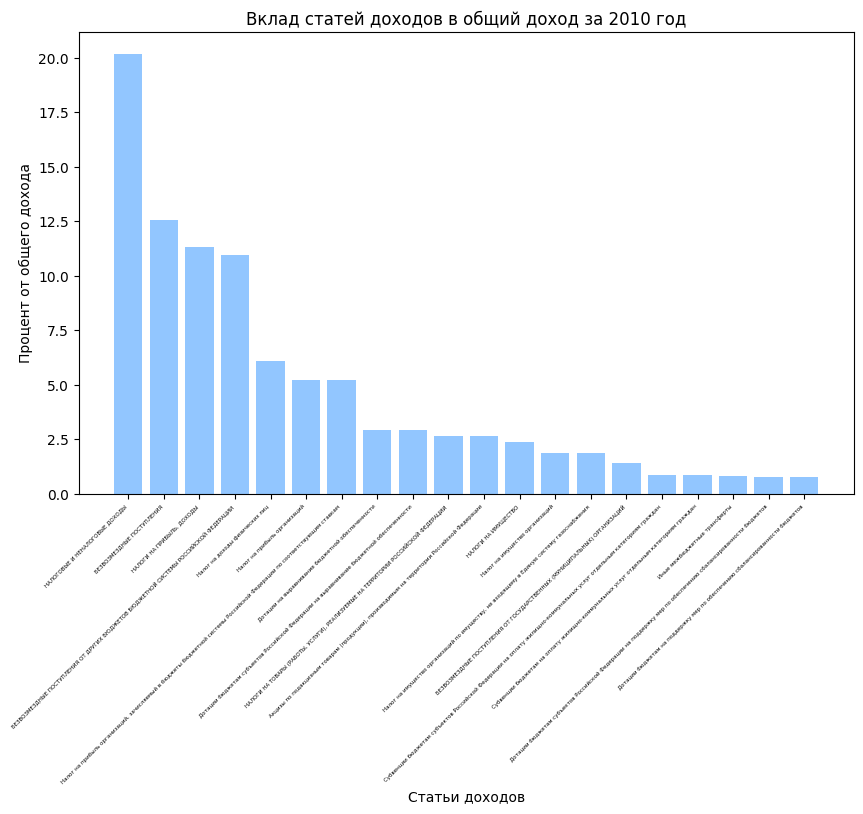

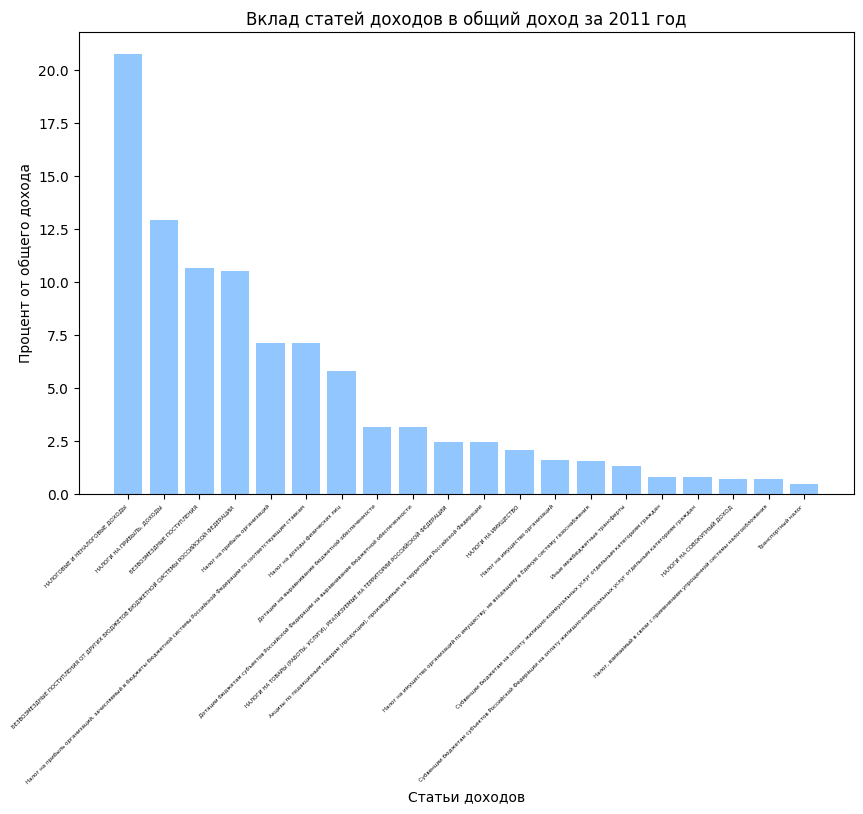

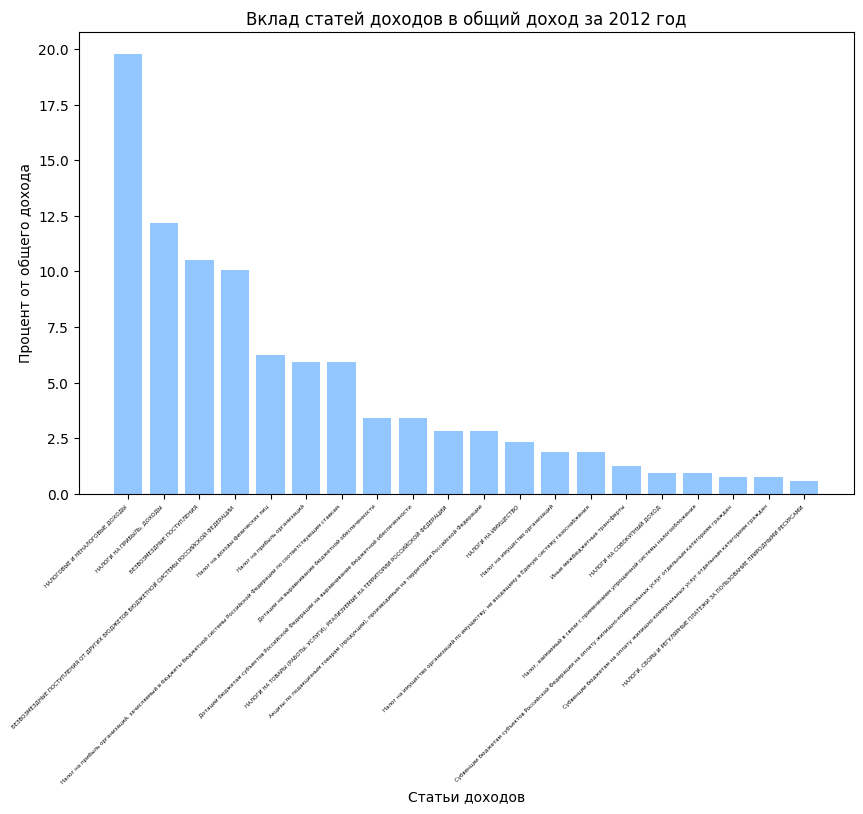

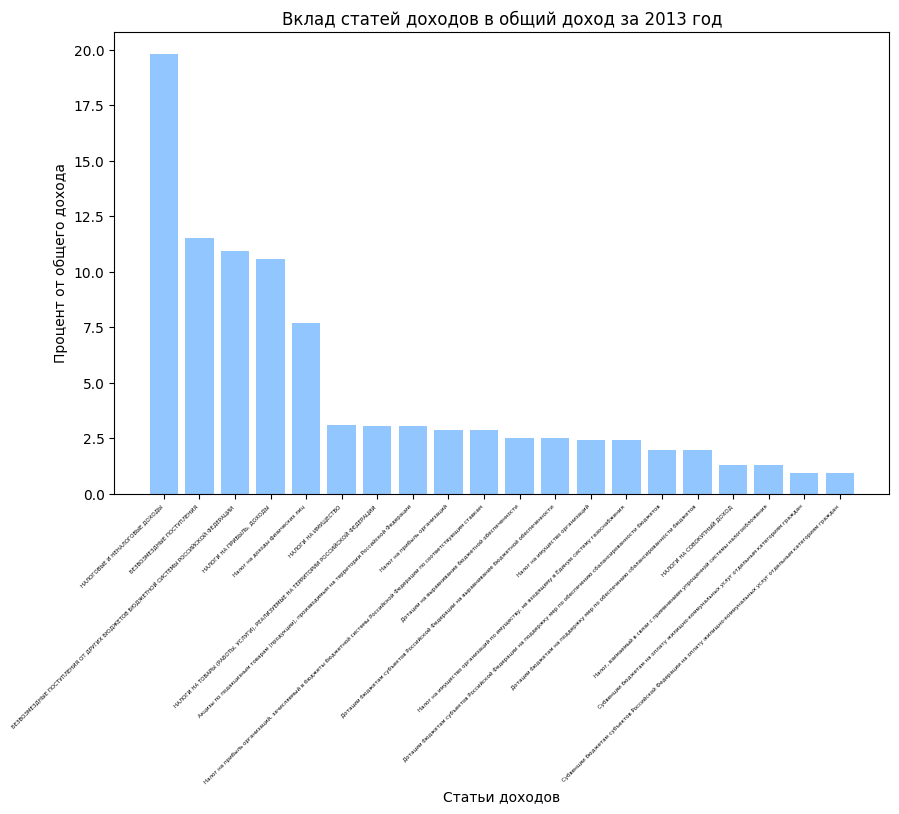

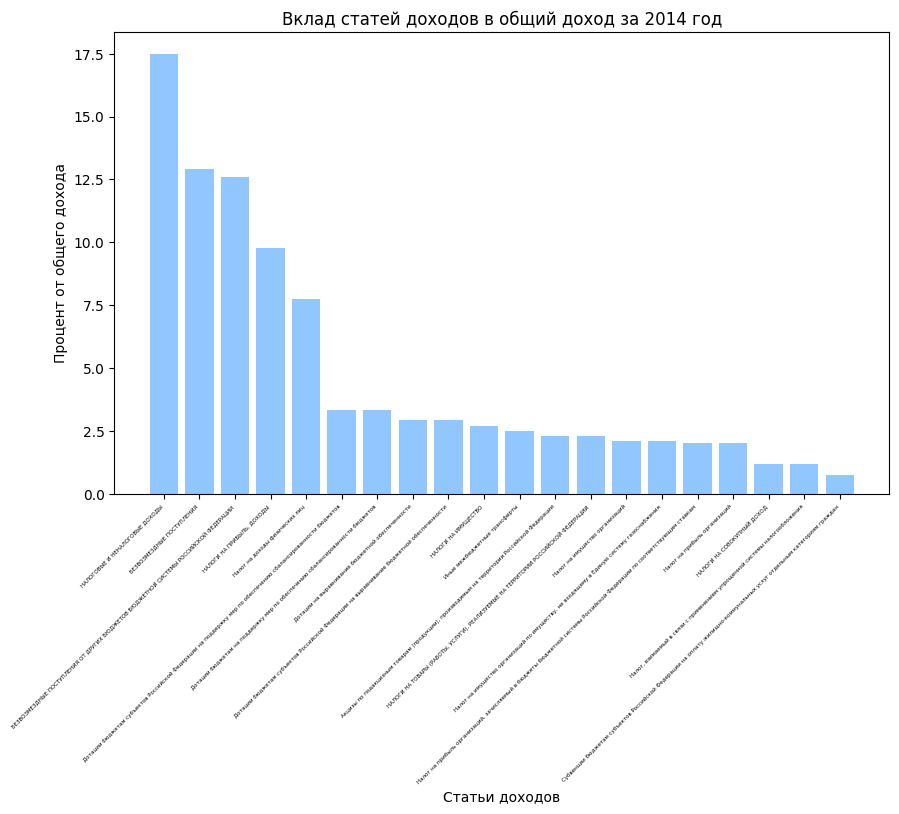

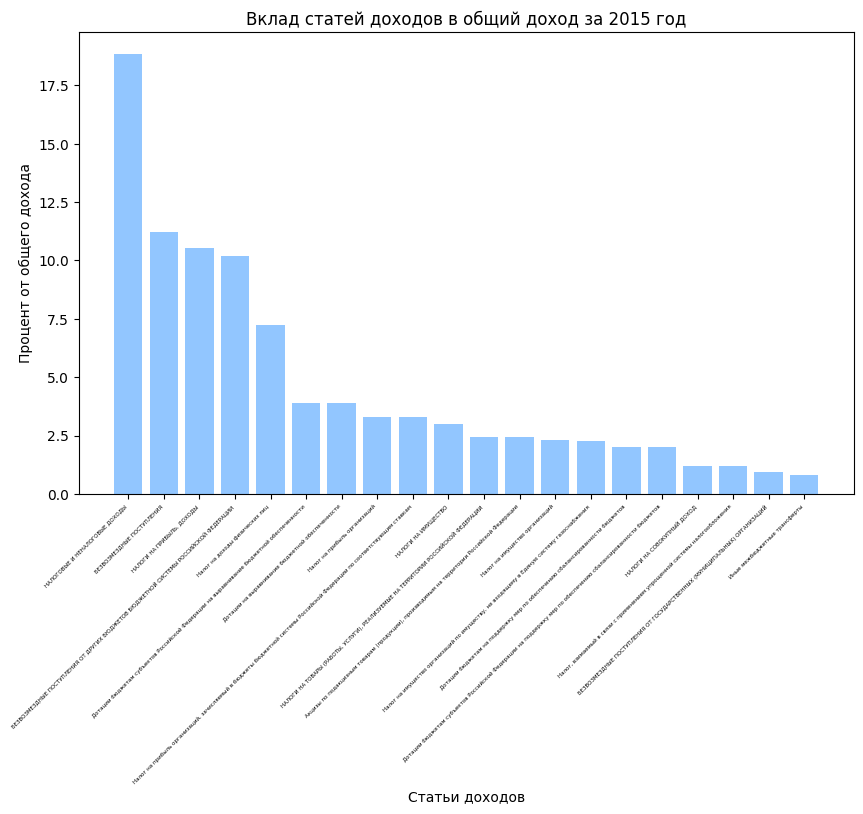

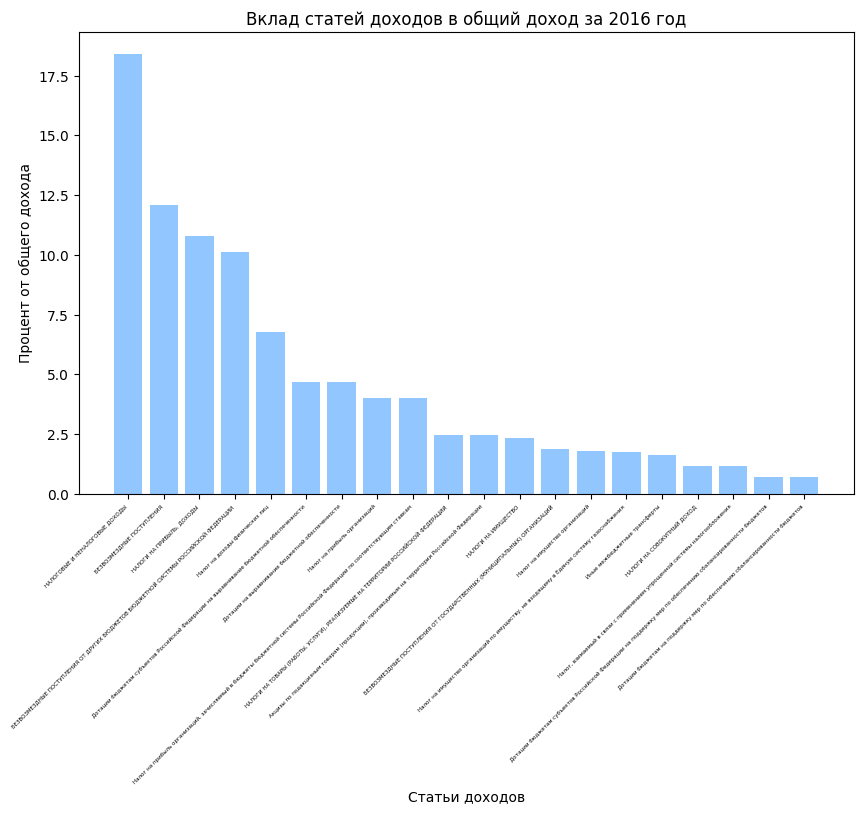

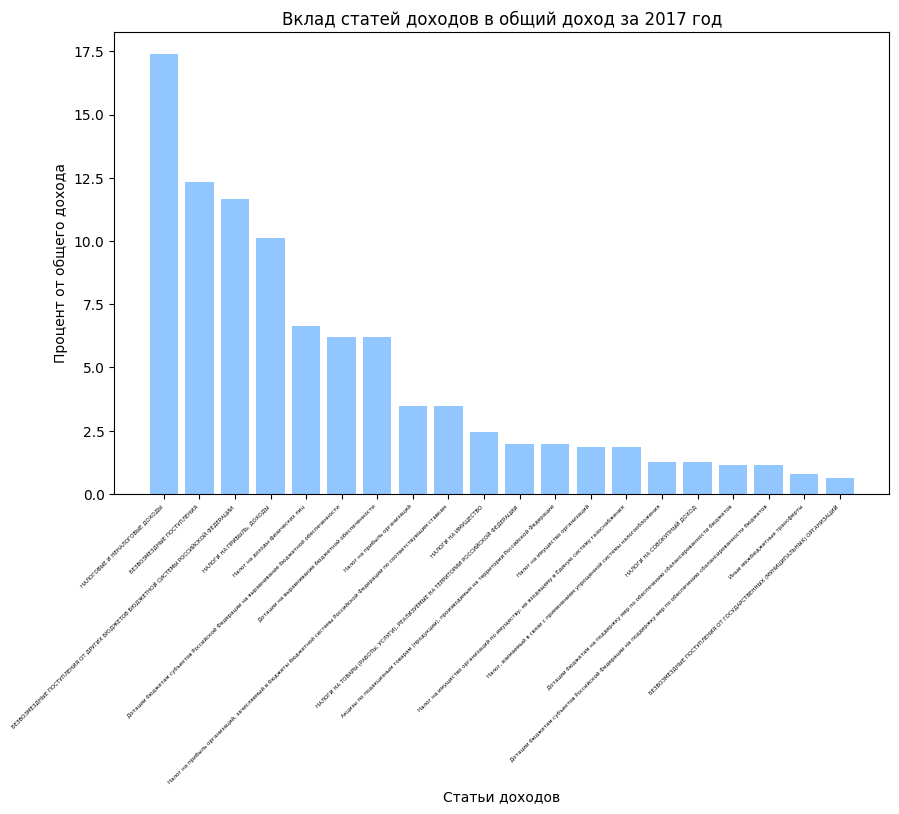

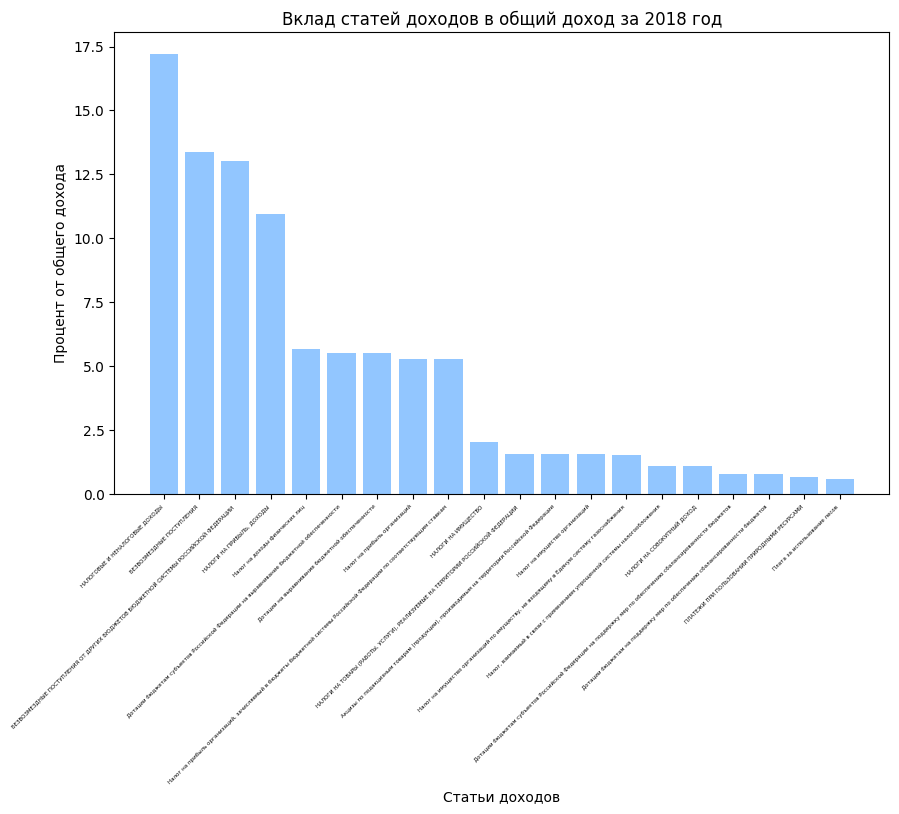

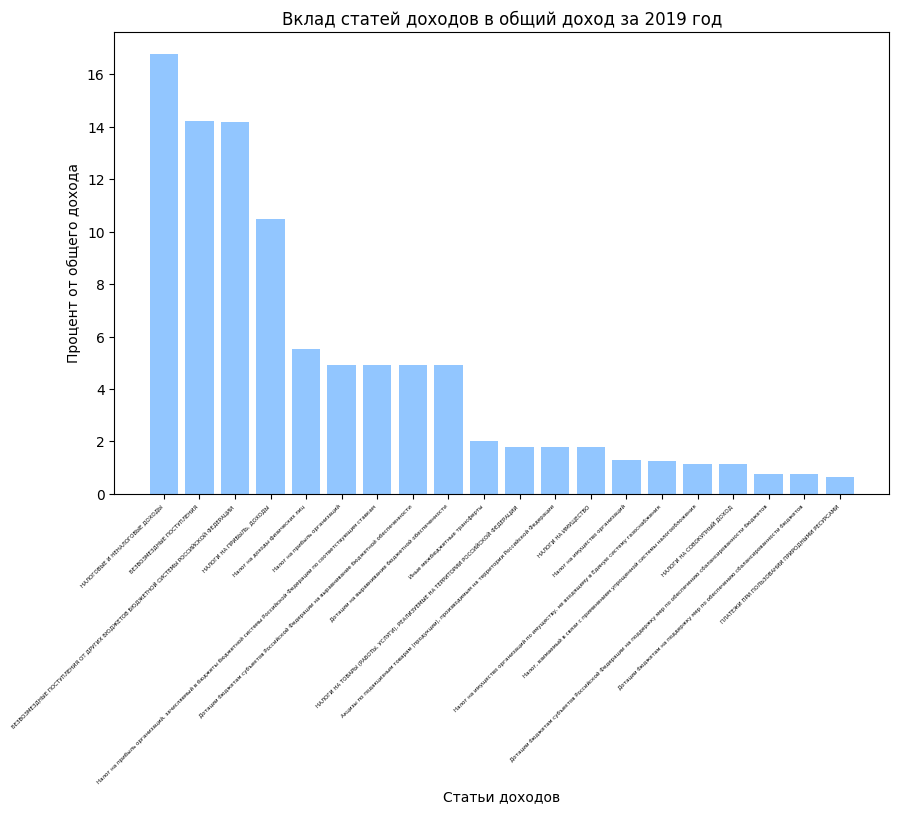

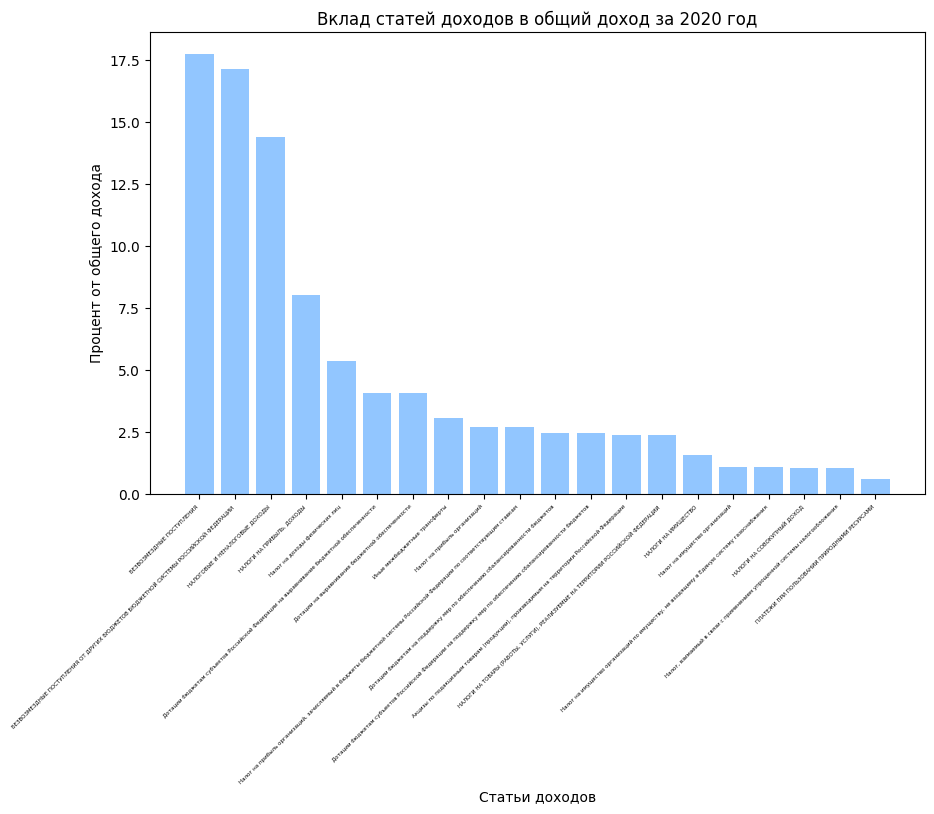

In [14]:
years = [col for col in df_i.columns[1:] if col != 'Процент']
top_income_features = df_i['Статьи доходов'].tolist()  # посмотрим на признаки, которые были значимы в каждый из рассматриваемых годов

plt.style.use('seaborn-v0_8-pastel')

for year in years:
    total_income = df_i[year].sum()

    df_i['Процент'] = (df_i[year] / total_income) * 100

    df_sorted = df_i.sort_values(by='Процент', ascending=False).head(20)
    top_20_this_year = df_sorted['Статьи доходов'].tolist()
    top_income_features = [item for item in top_income_features if item in top_20_this_year]

    plt.figure(figsize=(10, 6))
    plt.bar(df_sorted['Статьи доходов'], df_sorted['Процент'])

    plt.title(f'Вклад статей доходов в общий доход за {year} год')
    plt.xlabel('Статьи доходов')
    plt.ylabel('Процент от общего дохода')
    plt.xticks(rotation=45, ha='right', fontsize=4)
    plt.show()

df_i.drop(columns=["Процент"], inplace=True)

In [15]:
print(top_income_features)

['НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ', 'НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ', 'Налог на прибыль организаций', 'Налог на прибыль организаций, зачисляемый в бюджеты бюджетной системы Российской Федерации по соответствующим ставкам', 'Налог на доходы физических лиц', 'НАЛОГИ НА ТОВАРЫ (РАБОТЫ, УСЛУГИ), РЕАЛИЗУЕМЫЕ НА ТЕРРИТОРИИ РОССИЙСКОЙ ФЕДЕРАЦИИ', 'Акцизы по подакцизным товарам (продукции), производимым на территории Российской Федерации', 'НАЛОГИ НА ИМУЩЕСТВО', 'Налог на имущество организаций', 'Налог на имущество организаций по имуществу, не входящему в Единую систему газоснабжения', 'БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ', 'БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ ОТ ДРУГИХ БЮДЖЕТОВ БЮДЖЕТНОЙ СИСТЕМЫ РОССИЙСКОЙ ФЕДЕРАЦИИ', 'Дотации на выравнивание бюджетной обеспеченности', 'Дотации бюджетам субъектов Российской Федерации на выравнивание бюджетной обеспеченности']


Отобрали следующие признаки:
*   Налоговые и неналоговые доходы
*   Налоги на прибыль, доходы
*   Налог на доходы физических лиц
*   Безвозмездные поступления
*   Безвозмедные поступления от других бюджетов бюджетной системы Российской Федерации
*   ...

Сделаем тоже самое для расходов:







In [16]:
df_e = data_expenses[0]
for i in range(1, 11):
    df_e = pd.merge(df_e, data_expenses[i], on='Статьи расходов', how='inner')
    df_e = df_e.dropna()
    df_e = df_e.drop_duplicates(subset=['Статьи расходов'], keep='first')
df_e.reset_index(drop=True, inplace=True)
df_e.tail(7)

,Статьи расходов,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
30,Медицинская помощь в дневных стационарах всех ...,3.639863e+07,3.722818e+07,3.694223e+07,5.049336e+07,5.311873e+07,3.339730e+07,3.485480e+07,3.605800e+07,4.937170e+07,5.126360e+07,5.256070e+07
31,Скорая медицинская помощь,1.594648e+07,2.481903e+07,3.897883e+08,7.755800e+07,7.433290e+07,4.960830e+07,9.024366e+07,9.314356e+07,1.071030e+08,2.269098e+08,2.363849e+08
32,Пенсионное обеспечение,9.268151e+07,1.115253e+08,1.213238e+08,1.328323e+08,1.441400e+08,1.476857e+08,1.599490e+08,1.845540e+08,2.115993e+08,1.865767e+08,9.233742e+08
33,Социальное обслуживание населения,5.379140e+08,1.296291e+09,1.040602e+09,1.202305e+09,1.233887e+09,1.180445e+09,1.094221e+09,1.168187e+09,1.583912e+09,1.823256e+09,2.166673e+09
34,Социальное обеспечение населения,5.556901e+09,5.510346e+09,5.459395e+09,5.304088e+09,5.233812e+09,5.513860e+09,5.944818e+09,1.032297e+10,1.097208e+10,1.068044e+10,1.366427e+10
35,Охрана семьи и детства,4.216267e+06,1.745658e+08,7.059445e+08,6.391470e+08,7.129939e+08,6.819497e+08,9.661171e+08,1.016595e+09,1.065327e+09,1.122218e+09,1.163137e+09
36,Другие вопросы в области социальной политики,8.858598e+06,8.229087e+06,9.174500e+06,1.149583e+07,1.290500e+07,1.175532e+07,2.063997e+07,9.583790e+07,8.351531e+07,1.365834e+08,1.285339e+08


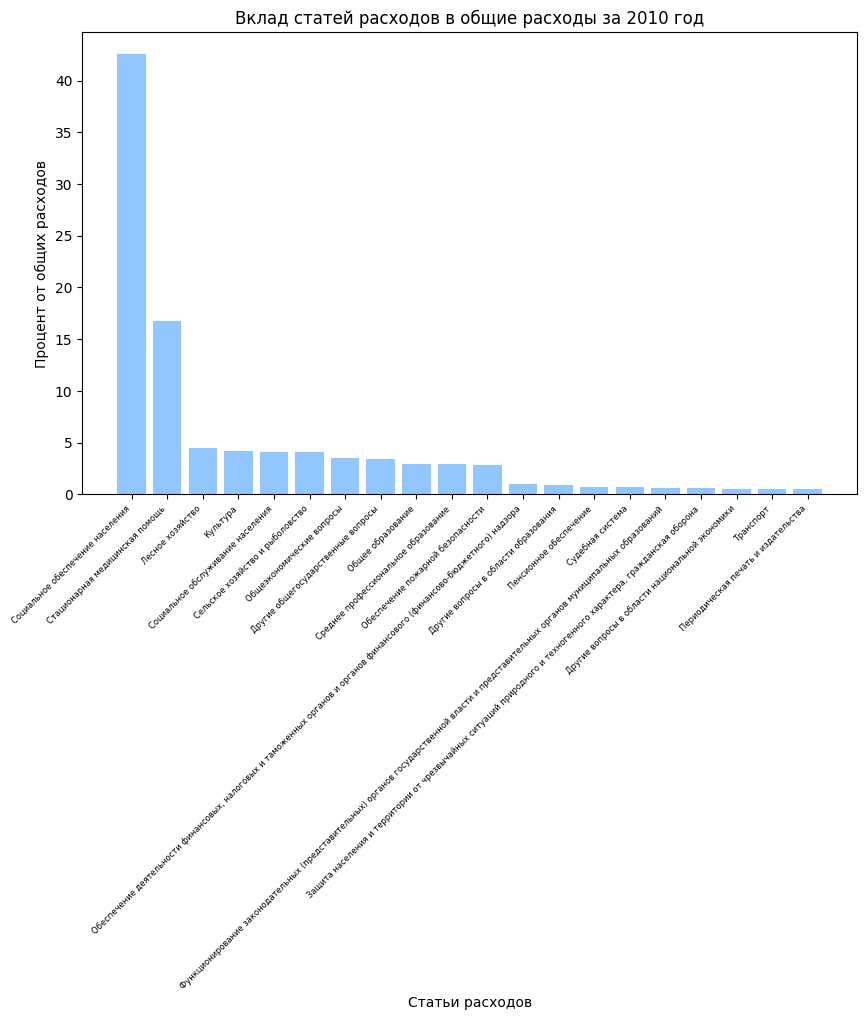

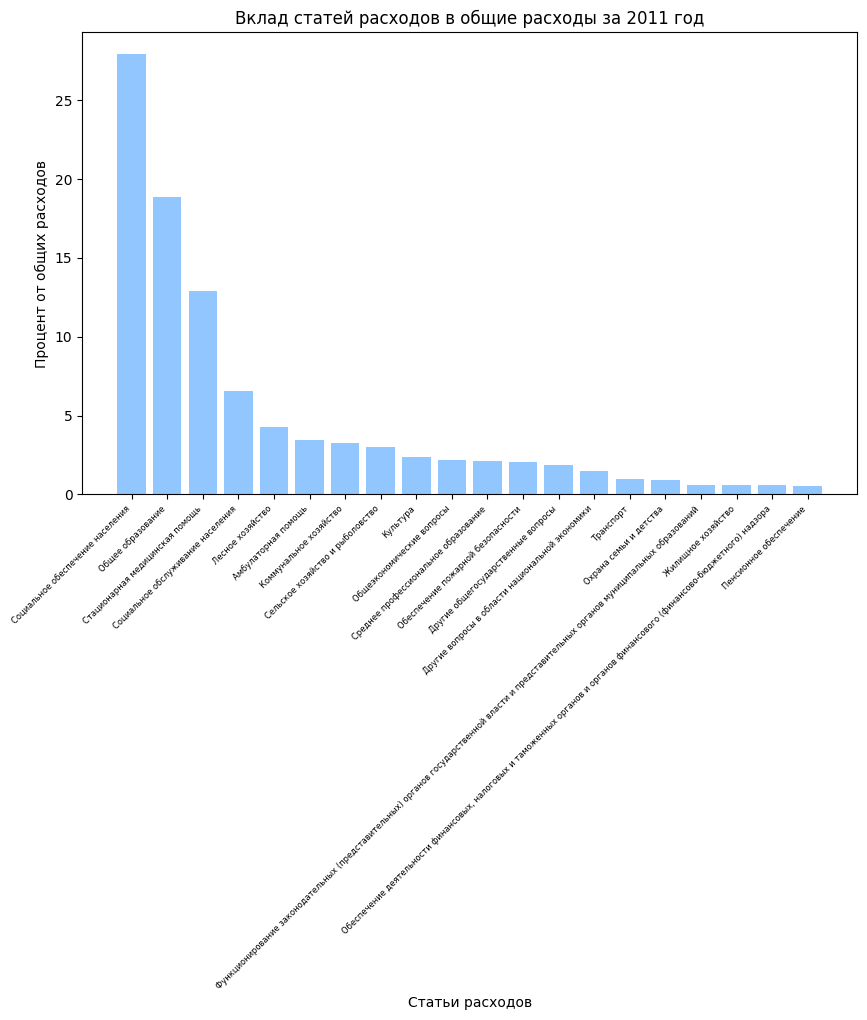

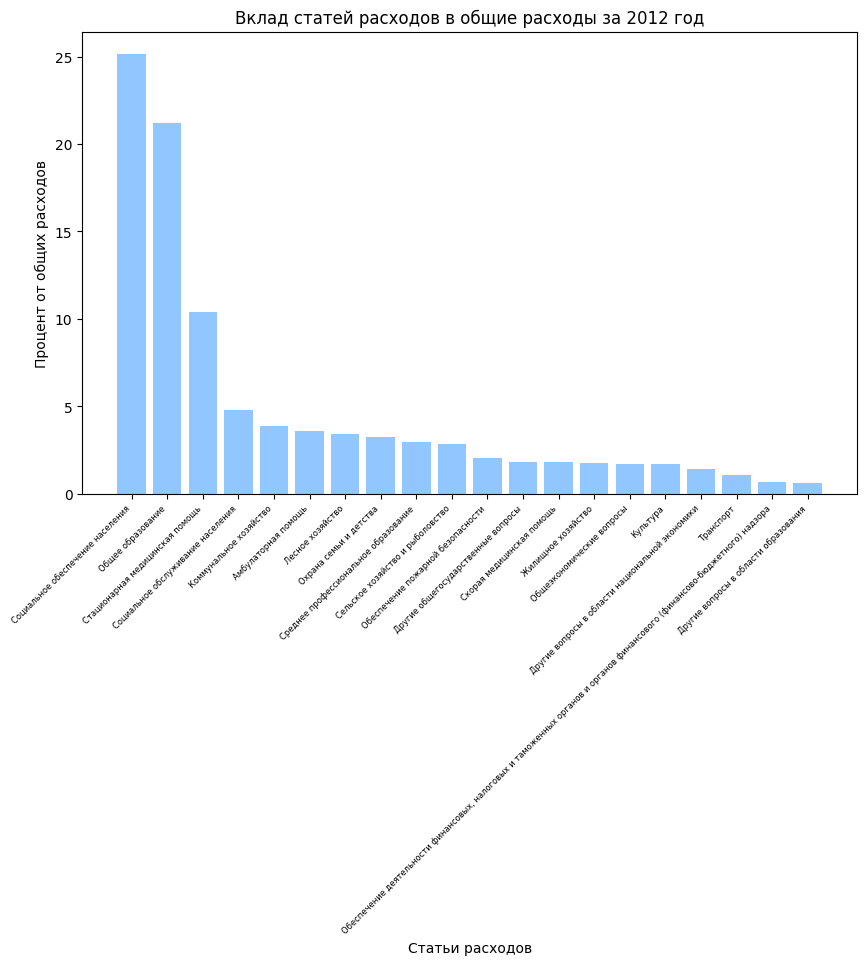

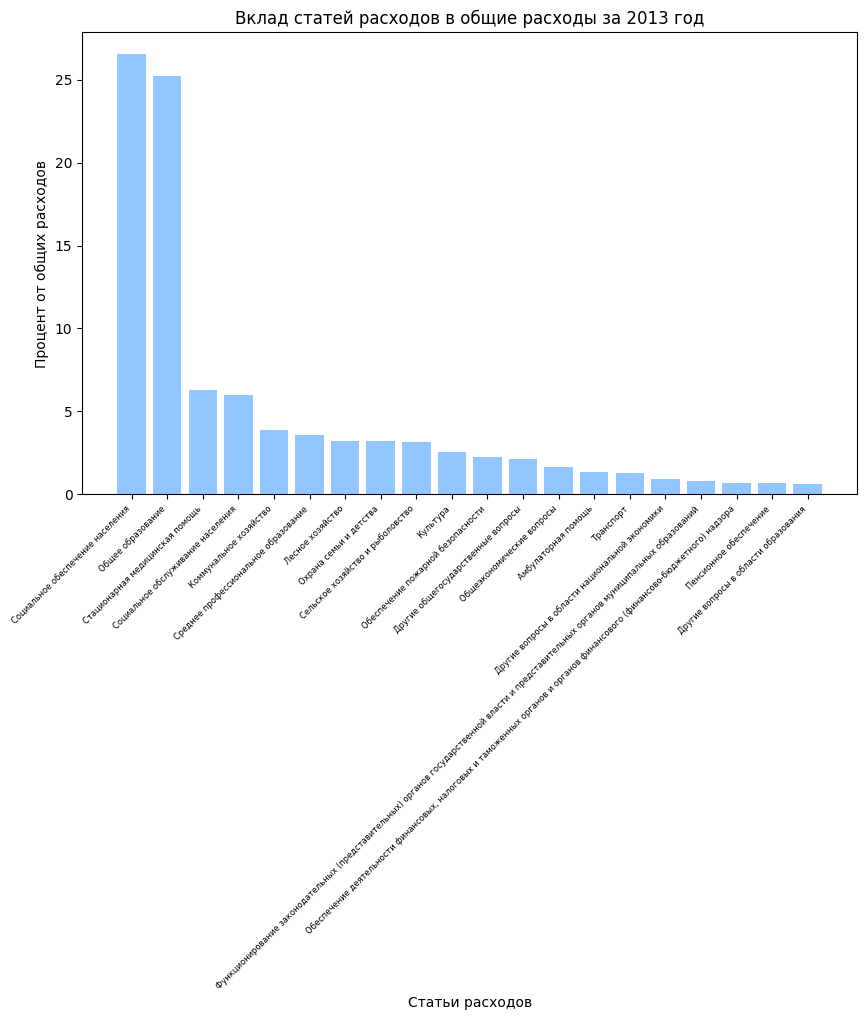

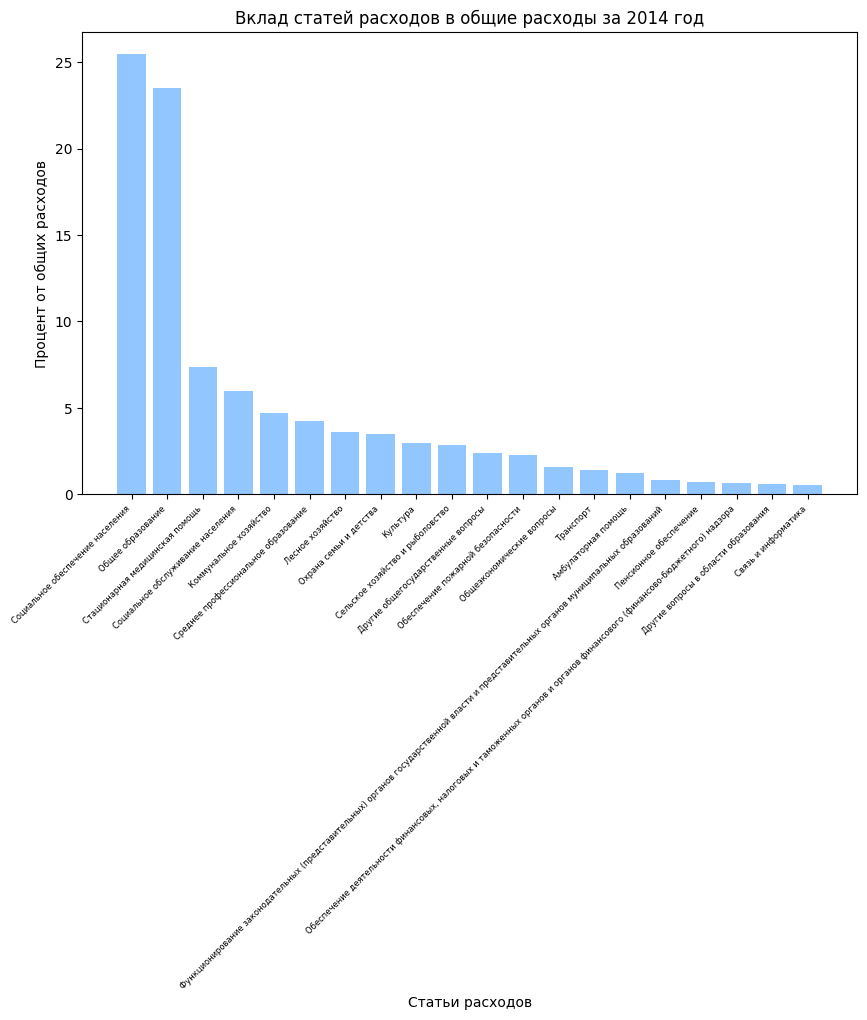

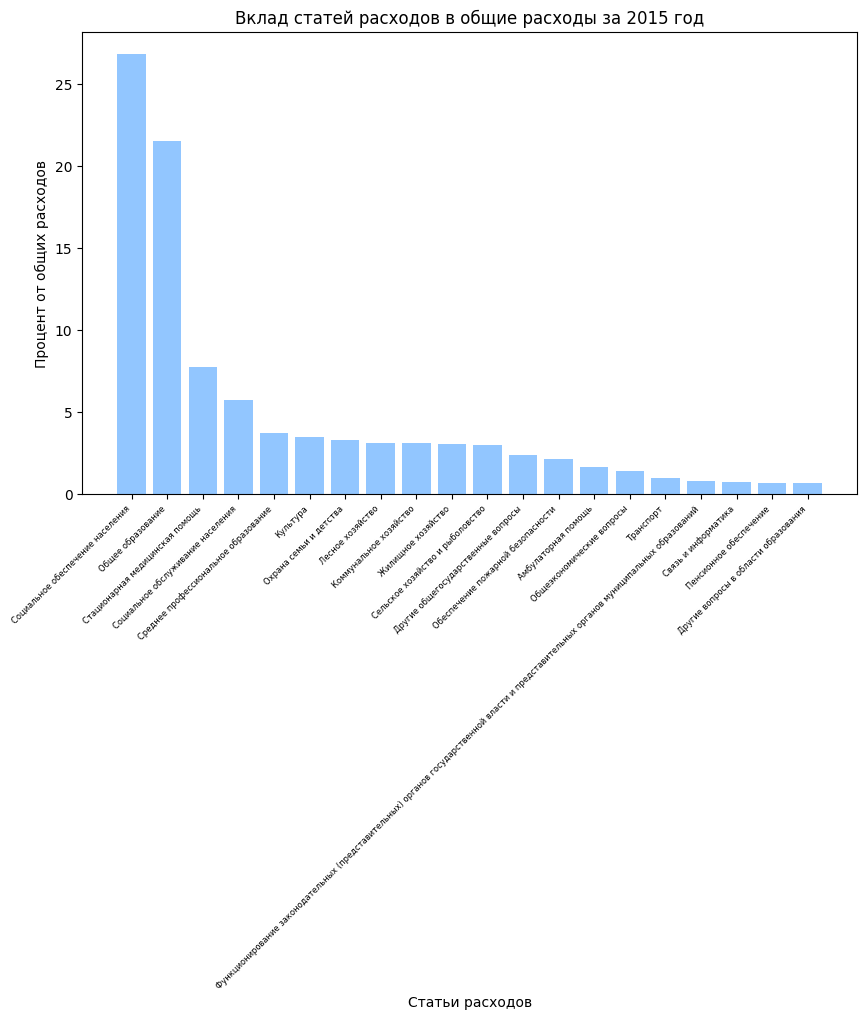

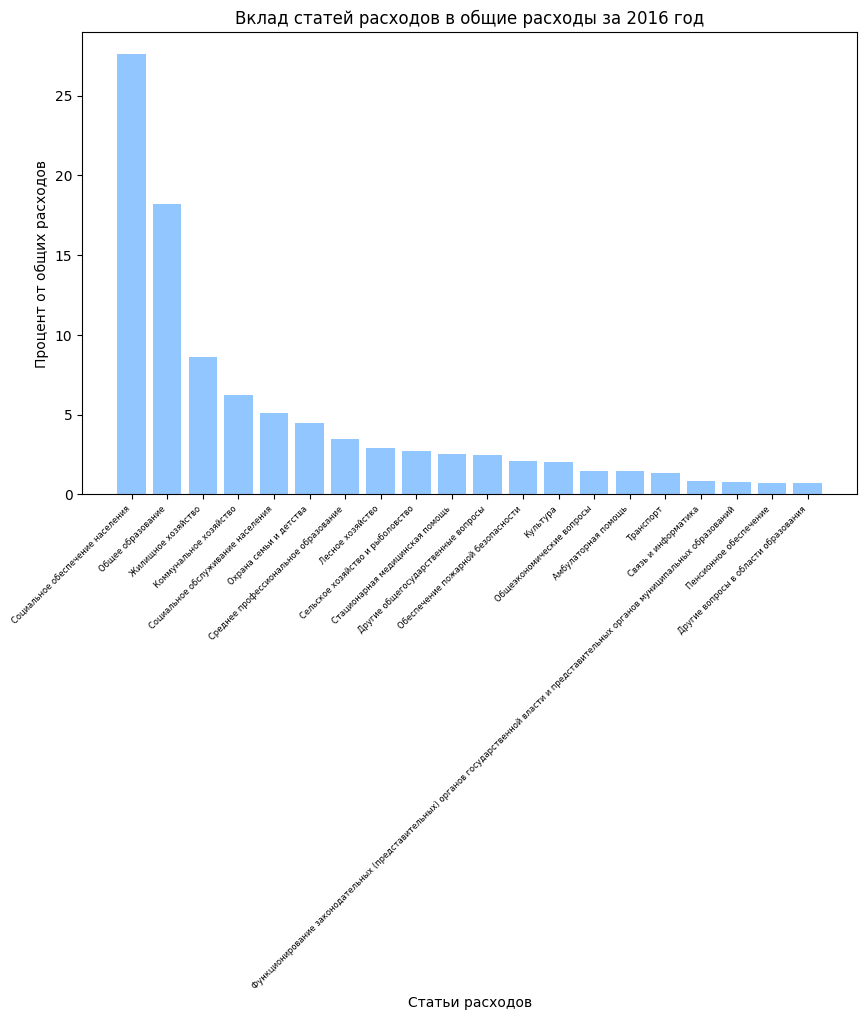

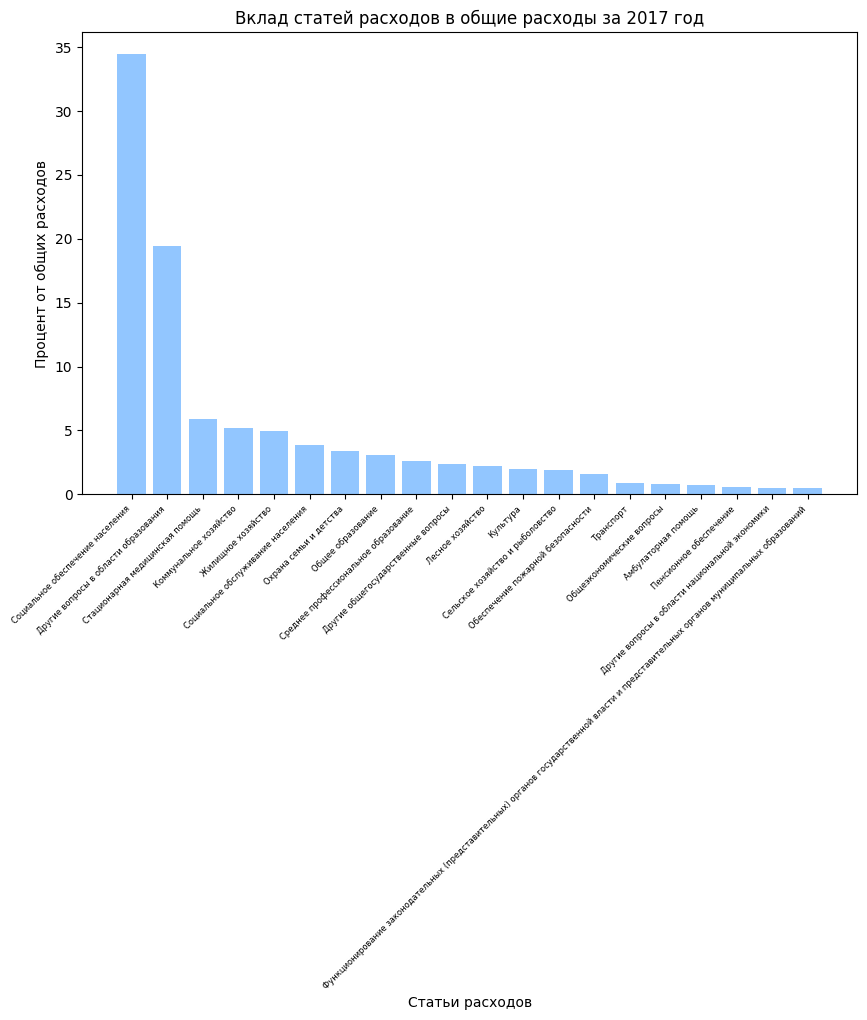

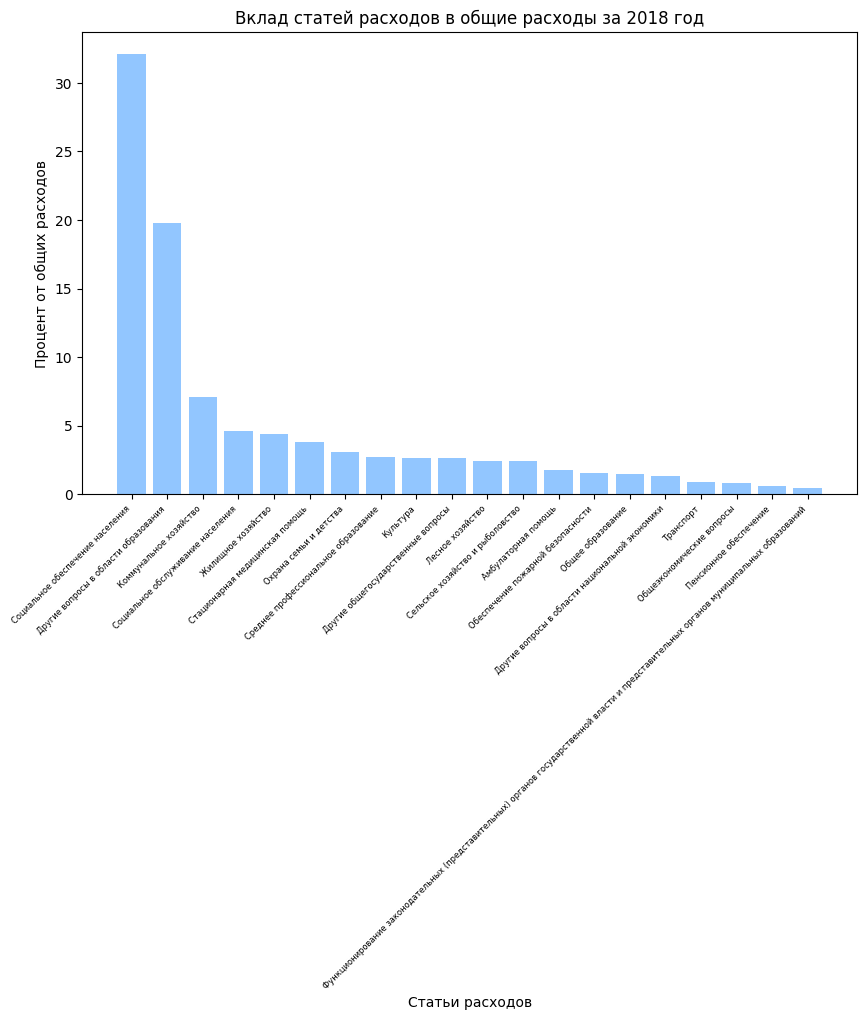

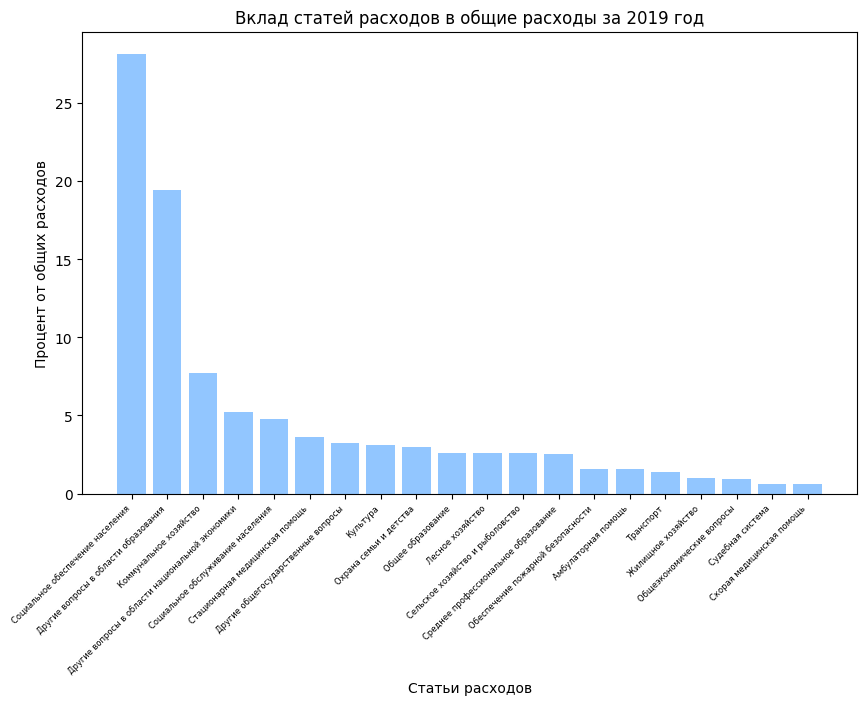

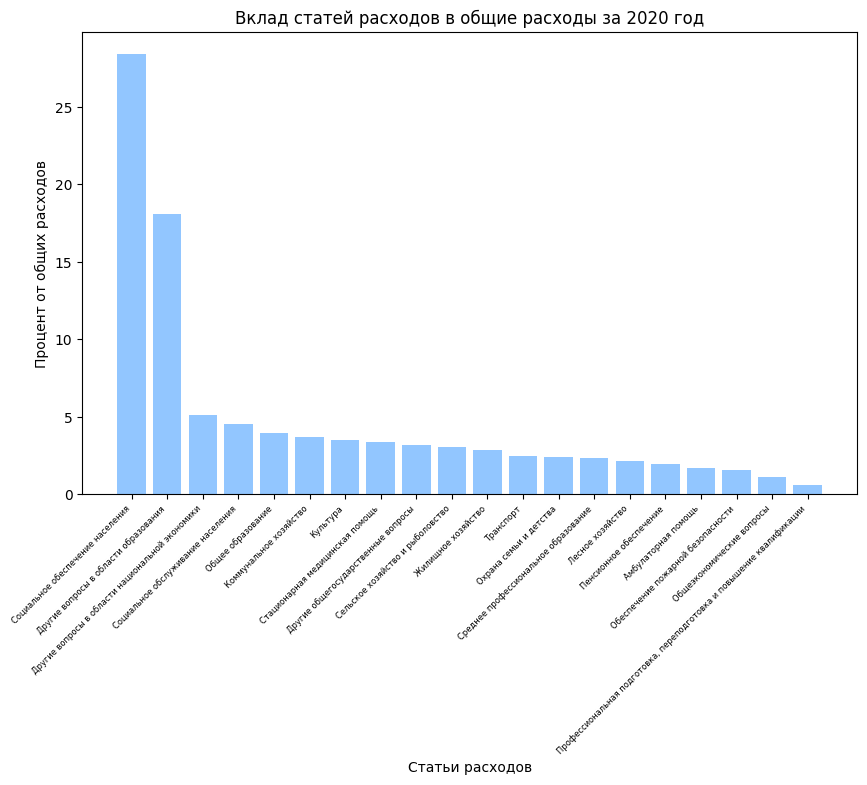

In [17]:
years = [col for col in df_e.columns[1:] if col != 'Процент']
top_expenses_features = df_e['Статьи расходов'].tolist()  # посмотрим на признаки, которые были значимы в каждый из рассматриваемых годов

plt.style.use('seaborn-v0_8-pastel')

for year in years:
    total_expenses = df_e[year].sum()

    df_e['Процент'] = (df_e[year] / total_expenses) * 100

    df_sorted = df_e.sort_values(by='Процент', ascending=False).head(20)
    top_20_this_year = df_sorted['Статьи расходов'].tolist()
    top_expenses_features = [item for item in top_expenses_features if item in top_20_this_year]

    plt.figure(figsize=(10, 6))
    plt.bar(df_sorted['Статьи расходов'], df_sorted['Процент'])

    plt.title(f'Вклад статей расходов в общие расходы за {year} год')
    plt.xlabel('Статьи расходов')
    plt.ylabel('Процент от общих расходов')
    plt.xticks(rotation=45, ha='right', fontsize=6)
    plt.show()

df_e.drop(columns=["Процент"], inplace=True)

In [18]:
print(top_expenses_features)

['Другие общегосударственные вопросы', 'Обеспечение пожарной безопасности', 'Общеэкономические вопросы', 'Сельское хозяйство и рыболовство', 'Лесное хозяйство', 'Транспорт', 'Общее образование', 'Среднее профессиональное образование', 'Культура', 'Стационарная медицинская помощь', 'Социальное обслуживание населения', 'Социальное обеспечение населения']


In [19]:
df_i.head()

,Статьи доходов,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ,1.532213e+10,1.820269e+10,1.757042e+10,1.517376e+10,1.595676e+10,1.780816e+10,1.965441e+10,2.012920e+10,2.660435e+10,2.776398e+10,2.713114e+10
1,"НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ",8.613483e+09,1.133454e+10,1.081373e+10,8.101886e+09,8.916328e+09,9.962889e+09,1.151807e+10,1.170081e+10,1.690036e+10,1.733688e+10,1.516577e+10
2,Налог на прибыль организаций,3.980212e+09,6.262562e+09,5.279888e+09,2.200022e+09,1.837840e+09,3.114014e+09,4.280042e+09,4.022683e+09,8.128882e+09,8.162340e+09,5.058408e+09
3,"Налог на прибыль организаций, зачисляемый в бю...",3.980212e+09,6.262562e+09,5.279888e+09,2.200022e+09,1.837840e+09,3.114014e+09,4.280042e+09,4.022683e+09,8.128882e+09,8.162340e+09,5.058408e+09
4,Налог на доходы физических лиц,4.633271e+09,5.071977e+09,5.533845e+09,5.901864e+09,7.078488e+09,6.848875e+09,7.238029e+09,7.678124e+09,8.771476e+09,9.174541e+09,1.010736e+10


Отобрали следующие признаки:


*   Стационарная медицинская помощь
*   Социальное обслуживание населения
*   Социальное обеспечение населения
*   ...

Итоговая табличка для анализа:




In [20]:
years = [col for col in df_i.columns[1:]]

result_df = pd.DataFrame(index=years)

for category in top_income_features:
    result_df[category] = [df_i[df_i['Статьи доходов'] == category][year].values[0] if any(df_i['Статьи доходов'] == category) else None for year in years]

for category in top_expenses_features:
    result_df[category] = [df_e[df_e['Статьи расходов'] == category][year].values[0] if any(df_e['Статьи расходов'] == category) else None for year in years]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': "Года"}, inplace=True)
result_df.head(15)


,Года,НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ,"НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ",Налог на прибыль организаций,"Налог на прибыль организаций, зачисляемый в бюджеты бюджетной системы Российской Федерации по соответствующим ставкам",Налог на доходы физических лиц,"НАЛОГИ НА ТОВАРЫ (РАБОТЫ, УСЛУГИ), РЕАЛИЗУЕМЫЕ НА ТЕРРИТОРИИ РОССИЙСКОЙ ФЕДЕРАЦИИ","Акцизы по подакцизным товарам (продукции), производимым на территории Российской Федерации",НАЛОГИ НА ИМУЩЕСТВО,Налог на имущество организаций,...,Общеэкономические вопросы,Сельское хозяйство и рыболовство,Лесное хозяйство,Транспорт,Общее образование,Среднее профессиональное образование,Культура,Стационарная медицинская помощь,Социальное обслуживание населения,Социальное обеспечение населения
0,2010,1.532213e+10,8.613483e+09,3.980212e+09,3.980212e+09,4.633271e+09,2.022770e+09,2.022770e+09,1.822412e+09,1.424921e+09,...,4.613233e+08,5.344504e+08,5.810863e+08,6.654573e+07,3.899500e+08,3.893630e+08,5.496402e+08,2.192016e+09,5.379140e+08,5.556901e+09
1,2011,1.820269e+10,1.133454e+10,6.262562e+09,6.262562e+09,5.071977e+09,2.137298e+09,2.137298e+09,1.804884e+09,1.384688e+09,...,4.367024e+08,5.974415e+08,8.432371e+08,1.986844e+08,3.720498e+09,4.146553e+08,4.693027e+08,2.547945e+09,1.296291e+09,5.510346e+09
2,2012,1.757042e+10,1.081373e+10,5.279888e+09,5.279888e+09,5.533845e+09,2.522932e+09,2.522932e+09,2.086072e+09,1.661340e+09,...,3.755222e+08,6.116664e+08,7.380867e+08,2.270782e+08,4.601667e+09,6.458944e+08,3.706742e+08,2.249384e+09,1.040602e+09,5.459395e+09
3,2013,1.517376e+10,8.101886e+09,2.200022e+09,2.200022e+09,5.901864e+09,2.339682e+09,2.339682e+09,2.374189e+09,1.853002e+09,...,3.292865e+08,6.351048e+08,6.468384e+08,2.628137e+08,5.048128e+09,7.216865e+08,5.168019e+08,1.259443e+09,1.202305e+09,5.304088e+09
4,2014,1.595676e+10,8.916328e+09,1.837840e+09,1.837840e+09,7.078488e+09,2.101871e+09,2.101871e+09,2.477487e+09,1.915689e+09,...,3.275809e+08,5.839086e+08,7.381032e+08,2.898527e+08,4.831598e+09,8.756664e+08,6.103971e+08,1.513735e+09,1.233887e+09,5.233812e+09
5,2015,1.780816e+10,9.962889e+09,3.114014e+09,3.114014e+09,6.848875e+09,2.286123e+09,2.286123e+09,2.826187e+09,2.172782e+09,...,2.924721e+08,6.166087e+08,6.467493e+08,2.024602e+08,4.432967e+09,7.635441e+08,7.234486e+08,1.600522e+09,1.180445e+09,5.513860e+09
6,2016,1.965441e+10,1.151807e+10,4.280042e+09,4.280042e+09,7.238029e+09,2.647462e+09,2.647462e+09,2.515470e+09,1.900600e+09,...,3.228818e+08,5.919693e+08,6.304193e+08,2.934691e+08,3.919480e+09,7.553356e+08,4.376385e+08,5.441335e+08,1.094221e+09,5.944818e+09
7,2017,2.012920e+10,1.170081e+10,4.022683e+09,4.022683e+09,7.678124e+09,2.280842e+09,2.280842e+09,2.846649e+09,2.168485e+09,...,2.385059e+08,5.672800e+08,6.607308e+08,2.702723e+08,9.144005e+08,7.860074e+08,6.012015e+08,1.780647e+09,1.168187e+09,1.032297e+10
8,2018,2.660435e+10,1.690036e+10,8.128882e+09,8.128882e+09,8.771476e+09,2.411248e+09,2.411248e+09,3.157426e+09,2.386165e+09,...,2.937999e+08,8.282476e+08,8.317059e+08,3.147711e+08,5.079902e+08,9.324786e+08,9.181577e+08,1.313700e+09,1.583912e+09,1.097208e+10
9,2019,2.776398e+10,1.733688e+10,8.162340e+09,8.162340e+09,9.174541e+09,2.987134e+09,2.987134e+09,2.957098e+09,2.113948e+09,...,3.547790e+08,9.760493e+08,9.783337e+08,5.211492e+08,9.827459e+08,9.567531e+08,1.176862e+09,1.376099e+09,1.823256e+09,1.068044e+10


In [21]:
Total_incomes = [[str(year) for year in range(2010, 2021)], [24873441775.45, 27556466680.93, 26893154749.54, 23984242603.04, 27750206180.02, 28390875283.93, 32546447594.29, 34385355496.24, 47268601337.1, 51272761265.22, 60597379486.3]]  # можно еще раз считать из таблицы, если бы названия данной статьи не менялись каждый год)

Total_expenses = [[str(year) for year in range(2010, 2021)], [25641875414.57, 27631246903.81, 29140749888.23, 28754420604.42, 31039085086.34, 31356669427.82, 34508364905.09, 36810091699.46, 43076921835.03, 50268395809.96, 67616189896.19]]

In [22]:
result_df['Общие доходы'] = [None] * len(result_df)
result_df['Общие расходы'] = [None] * len(result_df)

for i in range(len(Total_incomes[0])):
    year = Total_incomes[0][i]
    income = Total_incomes[1][i]
    expense = Total_expenses[1][i]

    result_df.loc[result_df["Года"].astype(str) == year, 'Общие доходы'] = income
    result_df.loc[result_df["Года"].astype(str) == year, 'Общие расходы'] = expense

result_df["Общие доходы"] = result_df["Общие доходы"].astype('float64')
result_df["Общие расходы"] = result_df["Общие расходы"].astype('float64')

result_df.head()

,Года,НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ,"НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ",Налог на прибыль организаций,"Налог на прибыль организаций, зачисляемый в бюджеты бюджетной системы Российской Федерации по соответствующим ставкам",Налог на доходы физических лиц,"НАЛОГИ НА ТОВАРЫ (РАБОТЫ, УСЛУГИ), РЕАЛИЗУЕМЫЕ НА ТЕРРИТОРИИ РОССИЙСКОЙ ФЕДЕРАЦИИ","Акцизы по подакцизным товарам (продукции), производимым на территории Российской Федерации",НАЛОГИ НА ИМУЩЕСТВО,Налог на имущество организаций,...,Лесное хозяйство,Транспорт,Общее образование,Среднее профессиональное образование,Культура,Стационарная медицинская помощь,Социальное обслуживание населения,Социальное обеспечение населения,Общие доходы,Общие расходы
0,2010,1.532213e+10,8.613483e+09,3.980212e+09,3.980212e+09,4.633271e+09,2.022770e+09,2.022770e+09,1.822412e+09,1.424921e+09,...,5.810863e+08,6.654573e+07,3.899500e+08,3.893630e+08,5.496402e+08,2.192016e+09,5.379140e+08,5.556901e+09,2.487344e+10,2.564188e+10
1,2011,1.820269e+10,1.133454e+10,6.262562e+09,6.262562e+09,5.071977e+09,2.137298e+09,2.137298e+09,1.804884e+09,1.384688e+09,...,8.432371e+08,1.986844e+08,3.720498e+09,4.146553e+08,4.693027e+08,2.547945e+09,1.296291e+09,5.510346e+09,2.755647e+10,2.763125e+10
2,2012,1.757042e+10,1.081373e+10,5.279888e+09,5.279888e+09,5.533845e+09,2.522932e+09,2.522932e+09,2.086072e+09,1.661340e+09,...,7.380867e+08,2.270782e+08,4.601667e+09,6.458944e+08,3.706742e+08,2.249384e+09,1.040602e+09,5.459395e+09,2.689315e+10,2.914075e+10
3,2013,1.517376e+10,8.101886e+09,2.200022e+09,2.200022e+09,5.901864e+09,2.339682e+09,2.339682e+09,2.374189e+09,1.853002e+09,...,6.468384e+08,2.628137e+08,5.048128e+09,7.216865e+08,5.168019e+08,1.259443e+09,1.202305e+09,5.304088e+09,2.398424e+10,2.875442e+10
4,2014,1.595676e+10,8.916328e+09,1.837840e+09,1.837840e+09,7.078488e+09,2.101871e+09,2.101871e+09,2.477487e+09,1.915689e+09,...,7.381032e+08,2.898527e+08,4.831598e+09,8.756664e+08,6.103971e+08,1.513735e+09,1.233887e+09,5.233812e+09,2.775021e+10,3.103909e+10


## 1. Предобработка датасета (2 балла)

- изучи датасет
- очисти данные в нём (есть ли в нём пропуски и выбросы? что ты можешь с ними сделать? сделай это.)

Я удалю значения с пропусками (сделал выше при формаровании фрейма), так как использование медианы/среднего/моды не очень релевантно когда всего 11 значений, если из них половина NaN, то медиана по оставшимся, к примеру, ничего адекватного не покажет). Судя по графикам и частям таблицы ниже выбросов нет, как их искать отдельно не знаю.





## 2. Найди параметры, которые влияют на бюджет (3.5 балла)

Поэкспериментируй с параметрами, найди 3 параметра, которые сильно связаны с значением бюджета Карелии за год (тут есть две цифры - расходы бюджета ИТОГО и доходы бюджета ИТОГО - искать параметры надо к обоим на основе **предыдущего года**) (при помощи коэффициента корреляции). Настоятельно рекомендуем поиграть с разными параметрами  - попробовать линейные комбинации, некоторые функции от параметров (log, возведение в степень, etc).

Оставь весь код экспериментов в этом блоке, но в конце опиши, какие параметры в итоге ты берёшь.

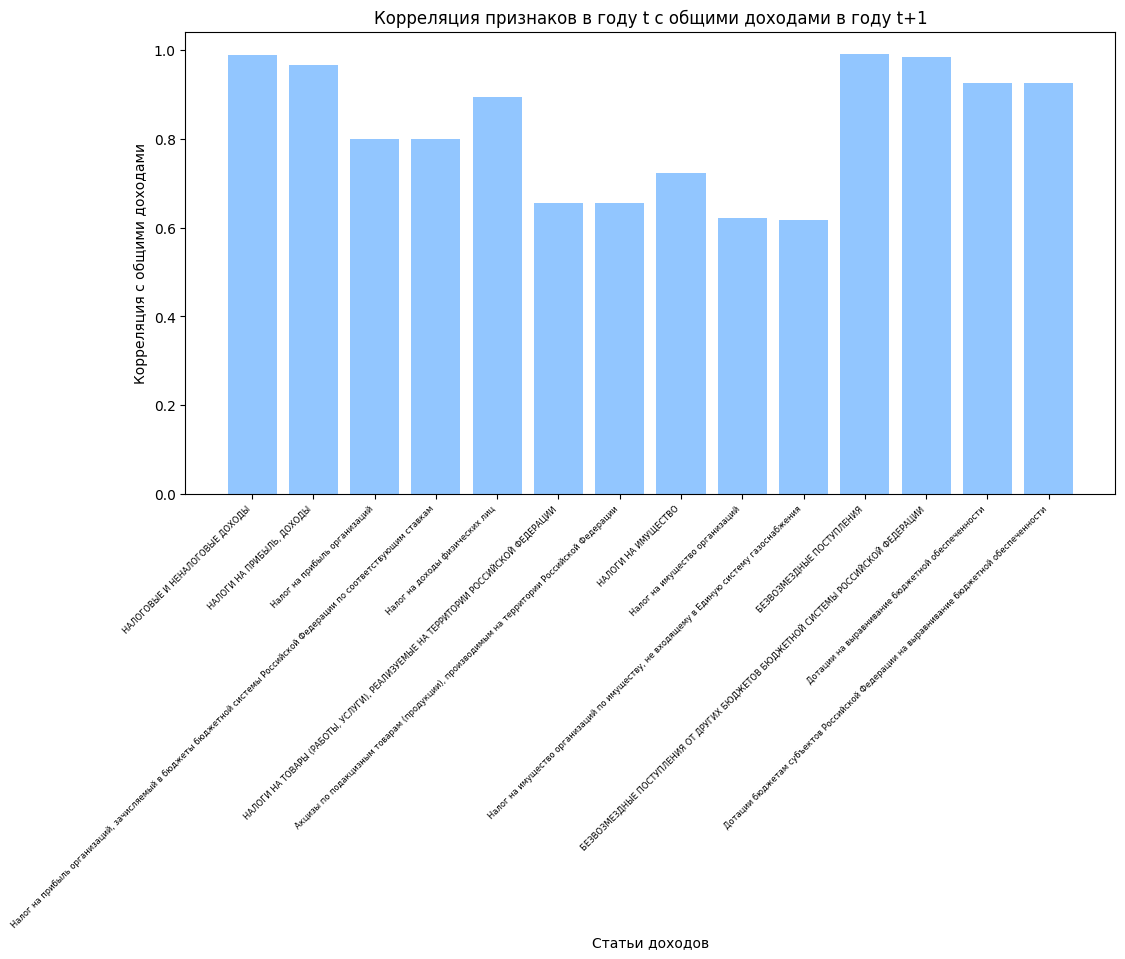

In [23]:
correlations_df_i = pd.DataFrame(index=top_income_features, columns=['correlation'])

next_year_total_income = result_df['Общие доходы'][1:]
for feature in top_income_features:
    correlation = result_df[feature][:len(result_df)-1].corr(next_year_total_income)
    correlations_df_i.loc[feature, 'correlation'] = correlation


plt.figure(figsize=(12, 6))
plt.bar(correlations_df_i.index, correlations_df_i['correlation'])
plt.xlabel("Статьи доходов")
plt.ylabel("Корреляция с общими доходами")
plt.title("Корреляция признаков в году t с общими доходами в году t+1")
plt.xticks(rotation=45, ha="right", fontsize=6)
plt.show()


In [24]:
incomes_to_consider = [correlations_df_i.index[i] for i in [0, 1, 10]]
print(incomes_to_consider)
correlations_df_i['correlation']

['НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ', 'НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ', 'БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ']


,correlation
НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ,0.988087
"НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ",0.966778
Налог на прибыль организаций,0.800008
"Налог на прибыль организаций, зачисляемый в бюджеты бюджетной системы Российской Федерации по соответствующим ставкам",0.800008
Налог на доходы физических лиц,0.893927
"НАЛОГИ НА ТОВАРЫ (РАБОТЫ, УСЛУГИ), РЕАЛИЗУЕМЫЕ НА ТЕРРИТОРИИ РОССИЙСКОЙ ФЕДЕРАЦИИ",0.656372
"Акцизы по подакцизным товарам (продукции), производимым на территории Российской Федерации",0.656372
НАЛОГИ НА ИМУЩЕСТВО,0.723604
Налог на имущество организаций,0.621671
"Налог на имущество организаций по имуществу, не входящему в Единую систему газоснабжения",0.616092


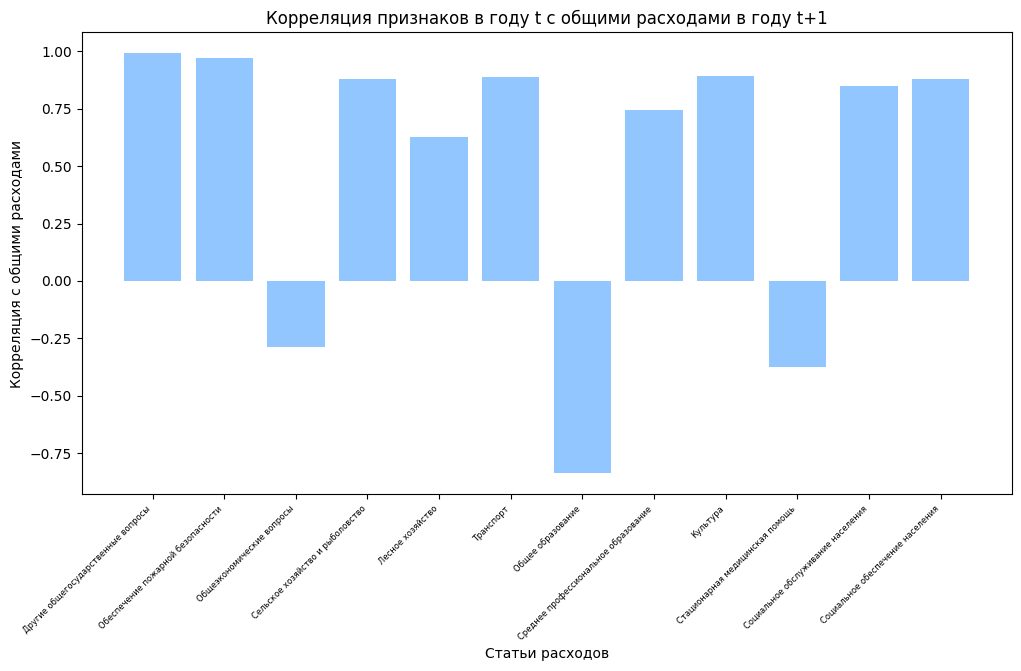

In [25]:
correlations_df_e = pd.DataFrame(index=top_expenses_features, columns=['correlation'])

next_year_total_expense = result_df['Общие расходы'][1:]
for feature in top_expenses_features:

    correlation = result_df[feature][:len(result_df)-1].corr(next_year_total_expense)
    correlations_df_e.loc[feature, 'correlation'] = correlation


plt.figure(figsize=(12, 6))
plt.bar(correlations_df_e.index, correlations_df_e['correlation'])
plt.xlabel("Статьи расходов")
plt.ylabel("Корреляция с общими расходами")
plt.title("Корреляция признаков в году t с общими расходами в году t+1")
plt.xticks(rotation=45, ha="right", fontsize=6)
plt.show()


In [26]:
expenses_to_consider = [correlations_df_e.index[i] for i in [0, 1, 6]]
print(expenses_to_consider)
correlations_df_e

['Другие общегосударственные вопросы', 'Обеспечение пожарной безопасности', 'Общее образование']


,correlation
Другие общегосударственные вопросы,0.991353
Обеспечение пожарной безопасности,0.969862
Общеэкономические вопросы,-0.287818
Сельское хозяйство и рыболовство,0.880455
Лесное хозяйство,0.628412
Транспорт,0.889659
Общее образование,-0.839419
Среднее профессиональное образование,0.746797
Культура,0.890979
Стационарная медицинская помощь,-0.376045


Для доходов выберу параметры, у которых корреляция выше 0,9 (у всех она положительная): Налоговые и неналоговые доходы; Налоги на прибыль, доходы; Безвозмездные поступления

У расходов я решил взять два параметра с корреляцией выше 0,9: Другие общегосударственные вопросы; обеспечение пожарной безопасности (что очень странно как мне кажется); и я решил добавить параметр с самой низкой корреляцией (-0.84): Общее образование

<font color="violet"> Тут надо написать параметры, которые ты выбрал </font>

# 3. Графики (1 балл)

Построй графики с выбранными параметрами и бюджетом Карелии. Что ты на них видишь?

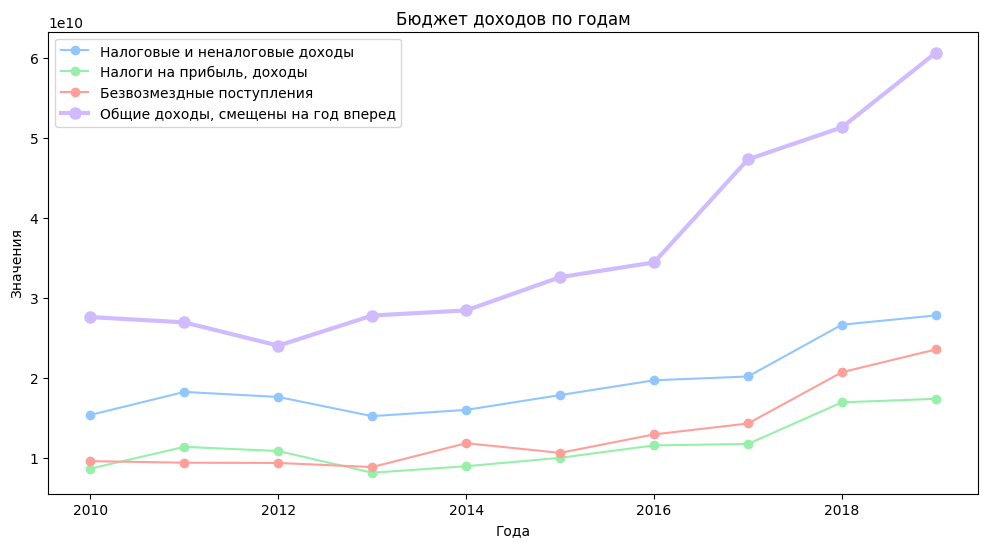

In [27]:
# Для доходов
years = [i for i in range(2010, 2020)]  # общие доходы снова будем смотреть на год вперед, значит смотрим на графики до 2019 года
plt.figure(figsize=(12, 6))

for feature in incomes_to_consider:
    plt.plot(years, result_df[feature][:len(result_df) - 1], marker='o', markersize=6, label=f'{feature[0].upper() + feature[1:].lower()}')

plt.plot(years, result_df["Общие доходы"][1:], marker='o', markersize=8, linewidth=3, label="Общие доходы, смещены на год вперед")
plt.title("Бюджет доходов по годам")
plt.xlabel('Года')
plt.ylabel('Значения')
plt.legend()
plt.show()


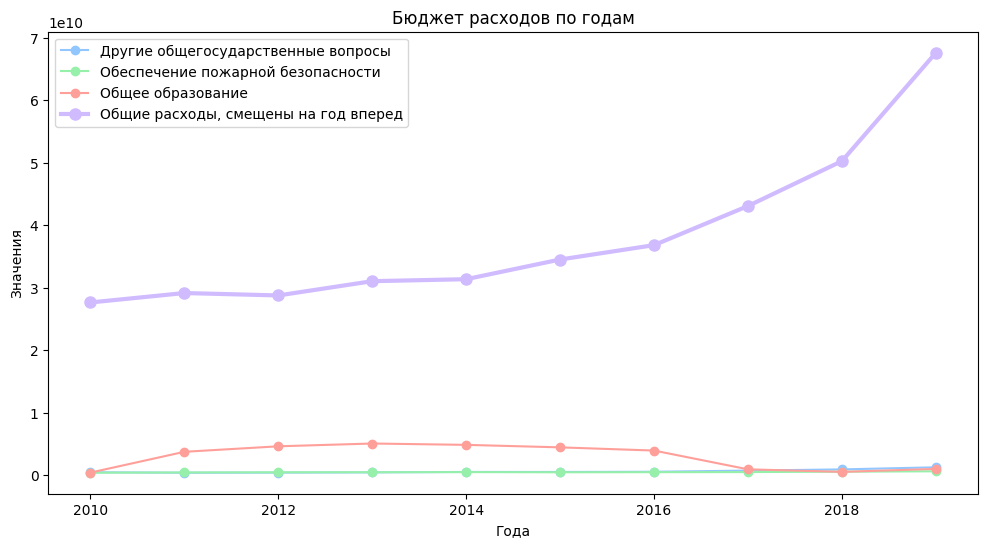

In [28]:
# Для расходов
plt.figure(figsize=(12, 6))

for feature in expenses_to_consider:
    plt.plot(years, result_df[feature][:len(result_df) - 1], marker='o', markersize=6, label=f'{feature[0].upper() + feature[1:].lower()}')

plt.plot(years, result_df["Общие расходы"][1:], marker='o', markersize=8, linewidth=3, label="Общие расходы, смещены на год вперед")
plt.title("Бюджет расходов по годам")
plt.xlabel('Года')
plt.ylabel('Значения')
plt.legend()
plt.show()

## 4. Анализ параметров (2 балла)

На основе графиков и самих параметров, расскажи:

- Построй гипотезы, наблюдаешь ли ты казуацию или здесь просто совпадение?
- Предложи гипотезы, как проверить, нет ли ошибок в твоих выводах
- Проанализируй взаимосвязь с параметрами между собой. Являются ли они сильноскореллированными? Имеет ли смысл использовать их всех вместе или достаточно одного?

1) **Налоговые и неналоговые доходы**:
Если честно, я бы никогда не сказал по графику, что корреляция у этого параметра 0,98, но каузация здесь есть на мой взгляд, тенденции с налоговыми поступлениями обычно стабильны (ставки меняются редко, законодательство строгое), поэтому налоговые доходы в этом году позволяют хорошо оценить налоговые доходы в следующем году, а так как они занимают весомую долю в общих доходах, что и объясняет влияние

2) **Налоги на прибыль, доходы**:
Такая же логика, как и с первым параметром

3) **Безвозмедные поступления**: Безвозмездные поступления в этом году могут увеличить доходы республики в следующем году, если они инвестируются в проекты, приносящие будущую прибыль, или если уменьшают долговую нагрузку, высвобождая средства для других нужд. Другого объяснения не нахожу, возможно каузации нет

4) **Обеспечение пожарной безопасности**: каузации нет, ибо это супер стабильная величина (если Карелия не разрослась в 2 раза за 10 лет), по графику это также видно. Стабильная величина не сможет повлиять на расходы в будущем, лишь занимает в них определенную почти фиксируемую величину.

5) **Другие государственные вопросы**: нельзя сделать выводы, не зная на что пошли в итоге деньги

6) **Общее образование**: вероятно, отрицательная корреляция может быть оправдана, так как увеличение расходов на образование в этом году может привести к снижению расходов в этой сфере в следующем (то есть уменьшит общие расходы)



Вероятно налоги на прибыль организации и налоговые доходы сильно скореллированыы друг с другом (зависят от политики государства и примерно в одинаковой мере зависят от состояния экономики в стране), их стоит объединить. Они наверно отрицательно скореллированы с безвозмездными поступлениями (если платишь много налогов, то безвозмедно отдавать не хочется и нечего). Между другими параметрами я не надеюсь увидеть высокой корреляции, х стоит рассматривать по отдельности

## 5. Линейная модель - BONUS TASK! - 2 балла.

Бонусное задание - попробуй построить линейную модель бюджета на основе выбранных параметров выше и (возможно) других параметров из датасета. Как думаешь, она состоятельная? Как бы ты проверял эту модель на корректность?

In [29]:
# TODO (optional)